<a href="https://colab.research.google.com/github/nidhib99/DeepLearning/blob/master/DL_Test1_J006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, cvX_test, y_train, cvY_test = train_test_split(x_train,y_train , test_size=0.20, random_state=20)

In [0]:
print(X_train.shape, y_train.shape)
print(cvX_test.shape,cvY_test.shape)
print(x_test.shape, y_test.shape)

(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)
(10000, 32, 32, 3) (10000, 1)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

In [0]:
#change shape from image to vector
X_train = X_train.reshape(40000, 32 * 32 * 3)
x_test = x_test.reshape(10000, 32 * 32 * 3)
cvX_test = cvX_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
x_test = x_test.astype('float32')
cvX_test = cvX_test.astype('float32')

X_train /= 255.0
x_test /=255.0
cvX_test /= 255.0


#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
y_test =  to_categorical(y_test, 10)
cvY_test =  to_categorical(cvY_test, 10)

In [0]:
model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
                  optimizer='adamax',
                  metrics=['accuracy'])
    
 

# training
history = model.fit(X_train, Y_train,
                        batch_size=32,
                        nb_epoch=20,
                        verbose=1,
                        validation_data=(cvX_test, cvY_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 97s 2ms/step - loss: 2.6818 - acc: 0.2901 - val_loss: 1.7475 - val_acc: 0.3736
Epoch 2/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.7165 - acc: 0.3805 - val_loss: 1.6752 - val_acc: 0.3987
Epoch 3/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.6194 - acc: 0.4166 - val_loss: 1.6379 - val_acc: 0.4144
Epoch 4/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.5448 - acc: 0.4444 - val_loss: 1.5637 - val_acc: 0.4388
Epoch 5/20
40000/40000 [==============================] - 96s 2ms/step - loss: 1.4989 - acc: 0.4622 - val_loss: 1.4950 - val_acc: 0.4637
Epoch 6/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.4504 - acc: 0.4786 - val_loss: 1.5773 - val_acc: 0.4502
Epoch 7/20
40000/40000 [==============================] - 95s 2ms/step - loss: 1.4133 - acc: 0.4929 - val_loss: 1.5289 - val_acc

Hyperparameters:
*   Loss: categorical_crossentropy
*   Layers: 4
*   Activation: relu and softmax
*   Optimizer: adamax


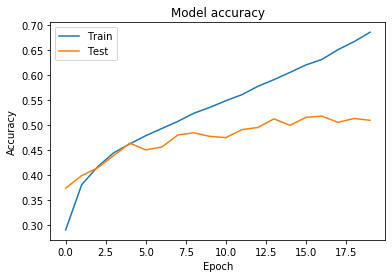

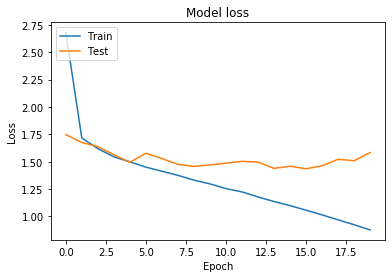

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
activation_54 (Activation)   (None, 1024)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_55 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_56 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)              

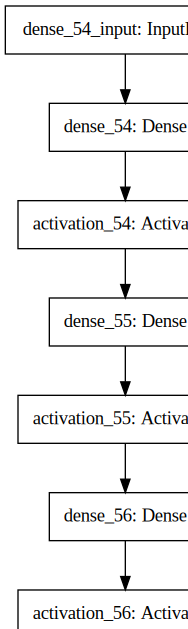

In [0]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
SVG(model_to_dot(model).create(prog='dot', format='svg'))